In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import product

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from prophet import Prophet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

import re

##Structure and Characteristics of the dataset

In [ ]:
df =pd.read_csv("train_1.csv")

In [ ]:
df.head(2)

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0


In [ ]:
df.shape

(145063, 551)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


In [ ]:
df.describe()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
count,1.243230e+05,1.242470e+05,1.245190e+05,1.244090e+05,1.244040e+05,1.245800e+05,1.243990e+05,1.247690e+05,1.248190e+05,1.247210e+05,...,1.412100e+05,1.414790e+05,1.418740e+05,1.413190e+05,1.411450e+05,1.413620e+05,1.412410e+05,1.412370e+05,1.414280e+05,1.415980e+05
mean,1.195857e+03,1.204004e+03,1.133676e+03,1.170437e+03,1.217769e+03,1.290273e+03,1.239137e+03,1.193092e+03,1.197992e+03,1.189651e+03,...,1.394096e+03,1.377482e+03,1.393099e+03,1.523740e+03,1.679607e+03,1.678302e+03,1.633966e+03,1.684308e+03,1.467943e+03,1.478282e+03
std,7.275352e+04,7.421515e+04,6.961022e+04,7.257351e+04,7.379612e+04,8.054448e+04,7.576288e+04,6.820002e+04,7.149717e+04,7.214536e+04,...,8.574880e+04,7.732794e+04,8.478533e+04,8.752210e+04,9.794534e+04,9.232482e+04,9.185831e+04,9.014266e+04,8.155481e+04,8.873567e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.300000e+01,1.300000e+01,1.200000e+01,1.300000e+01,1.400000e+01,1.100000e+01,1.300000e+01,1.300000e+01,1.400000e+01,1.400000e+01,...,2.200000e+01,2.200000e+01,2.000000e+01,2.100000e+01,2.200000e+01,2.300000e+01,2.400000e+01,2.300000e+01,2.300000e+01,2.100000e+01
50%,1.090000e+02,1.080000e+02,1.050000e+02,1.050000e+02,1.130000e+02,1.130000e+02,1.150000e+02,1.170000e+02,1.150000e+02,1.130000e+02,...,1.490000e+02,1.430000e+02,1.320000e+02,1.450000e+02,1.600000e+02,1.620000e+02,1.630000e+02,1.600000e+02,1.540000e+02,1.360000e+02
75%,5.240000e+02,5.190000e+02,5.040000e+02,4.870000e+02,5.400000e+02,5.550000e+02,5.510000e+02,5.540000e+02,5.490000e+02,5.450000e+02,...,6.070000e+02,5.980000e+02,5.690000e+02,6.280000e+02,6.590000e+02,6.680000e+02,6.540000e+02,6.490000e+02,6.350000e+02,5.610000e+02
max,2.038124e+07,2.075219e+07,1.957397e+07,2.043964e+07,2.077211e+07,2.254467e+07,2.121089e+07,1.910791e+07,1.999385e+07,2.020182e+07,...,2.420108e+07,2.253925e+07,2.505662e+07,2.586575e+07,2.834288e+07,2.691699e+07,2.702505e+07,2.607382e+07,2.436397e+07,2.614954e+07


From the above data, we can get the statistical values of the dataset like Mean, Minimum, Maximum, Count and so on.

In [ ]:
df.columns

Index(['Page', '2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
       '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09',
       ...
       '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
       '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31'],
      dtype='object', length=551)

In [ ]:
# loading exog file
df1= pd.read_csv('Exog_Campaign_eng')

In [ ]:
df1.head()

,Exog
0,0
1,0
2,0
3,0
4,0


In [ ]:
df.isna().sum()

Page              0
2015-07-01    20740
2015-07-02    20816
2015-07-03    20544
2015-07-04    20654
              ...  
2016-12-27     3701
2016-12-28     3822
2016-12-29     3826
2016-12-30     3635
2016-12-31     3465
Length: 551, dtype: int64

In [ ]:
days= [i for i in range(1, len(df.columns))]

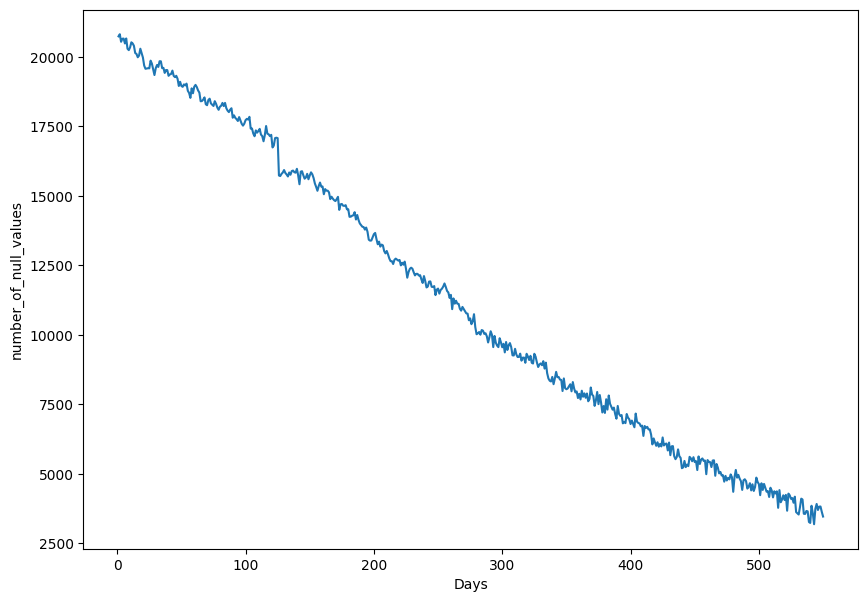

In [ ]:
plt.figure(figsize=(10,7))
sns.lineplot(x= days, y= df.isna().sum()[1:])
plt.xlabel("Days")
plt.ylabel("number_of_null_values")
plt.show()

Some websites initially have all NaN values, possibly because they were created after that period, resulting in no traffic data being available for that time.

In [ ]:
print(df.shape)
data=df.dropna(how='all')
print(df.shape)

df=df.dropna(thresh=300)
print(df.shape)

(145063, 551)
(145063, 551)
(133617, 551)


In [ ]:
df=data.fillna(0)
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [ ]:
#Function to Extract Language from Page using Regex
def get_language(name):
    if len(re.findall(r'_(.{2}).wikipedia.org_', name)) == 1 :
        return re.findall(r'_(.{2}).wikipedia.org_', name)[0]
    else: return 'Unknown_language'

df['language'] = df['Page'].apply(get_language)


language_dict ={'de':'German',
                'en':'English',
                'es': 'Spanish',
                'fr': 'French',
                'ja': 'Japenese' ,
                'ru': 'Russian',
                'zh': 'Chinese',
                'Unknown_language': 'Unknown_lang'}

df['language'] = df['language'].map(language_dict)

In [ ]:
# Access_type
def get_access_type(name):
    if len(re.findall(r'all-access|mobile-web|desktop', name)) == 1 :
        return re.findall(r'all-access|mobile-web|desktop', name)[0]
    else: return 'No Access_type'

df['access_type'] = df['Page'].apply(get_access_type)

In [ ]:
def get_access_origin(name):
    if len(re.findall(r'[ai].org_(.*)_(.*)$', name)) == 1 :
        return re.findall(r'[ai].org_(.*)_(.*)$', name)[0][1]
    else: return 'No Access_origin'

df['access_origin'] = df['Page'].apply(get_access_origin)

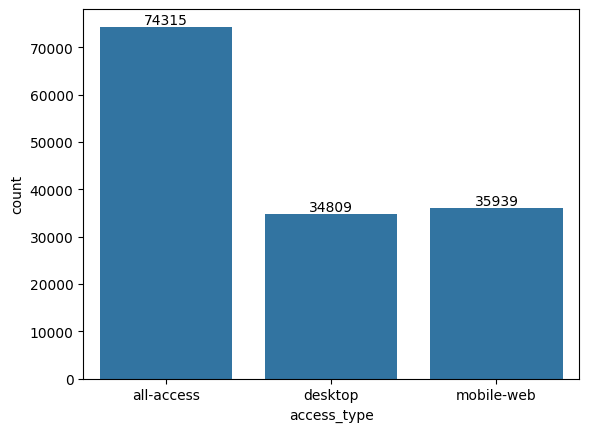

In [ ]:
label= sns.countplot(data=df, x="access_type")
for i in label.containers:
  label.bar_label(i)
plt.show()

From the above data, it can been seen that desktop access_type and mobile-web almost have same usage.

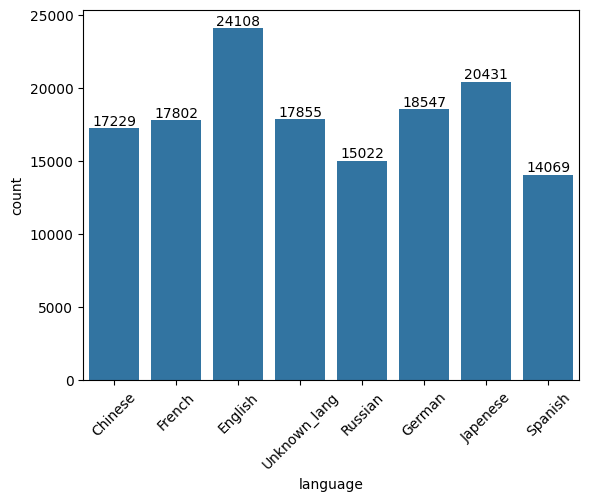

In [ ]:
L1= sns.countplot(data=df, x ="language")
for i in L1.containers:
  L1.bar_label(i)
plt.xticks(rotation=45)
plt.show()

##Reshaping Data

In [ ]:
reshaped = df.melt(id_vars = ['Page','language','access_type','access_origin'], var_name="Date", value_name="Visits")


In [ ]:
reshaped.head()

,Page,language,access_type,access_origin,Date,Visits
0,2NE1_zh.wikipedia.org_all-access_spider,Chinese,all-access,spider,2015-07-01,18.0
1,2PM_zh.wikipedia.org_all-access_spider,Chinese,all-access,spider,2015-07-01,11.0
2,3C_zh.wikipedia.org_all-access_spider,Chinese,all-access,spider,2015-07-01,1.0
3,4minute_zh.wikipedia.org_all-access_spider,Chinese,all-access,spider,2015-07-01,35.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,Chinese,all-access,spider,2015-07-01,0.0


In [ ]:
lang_data = reshaped.groupby(['language', 'Date'],as_index=False)['Visits'].mean()


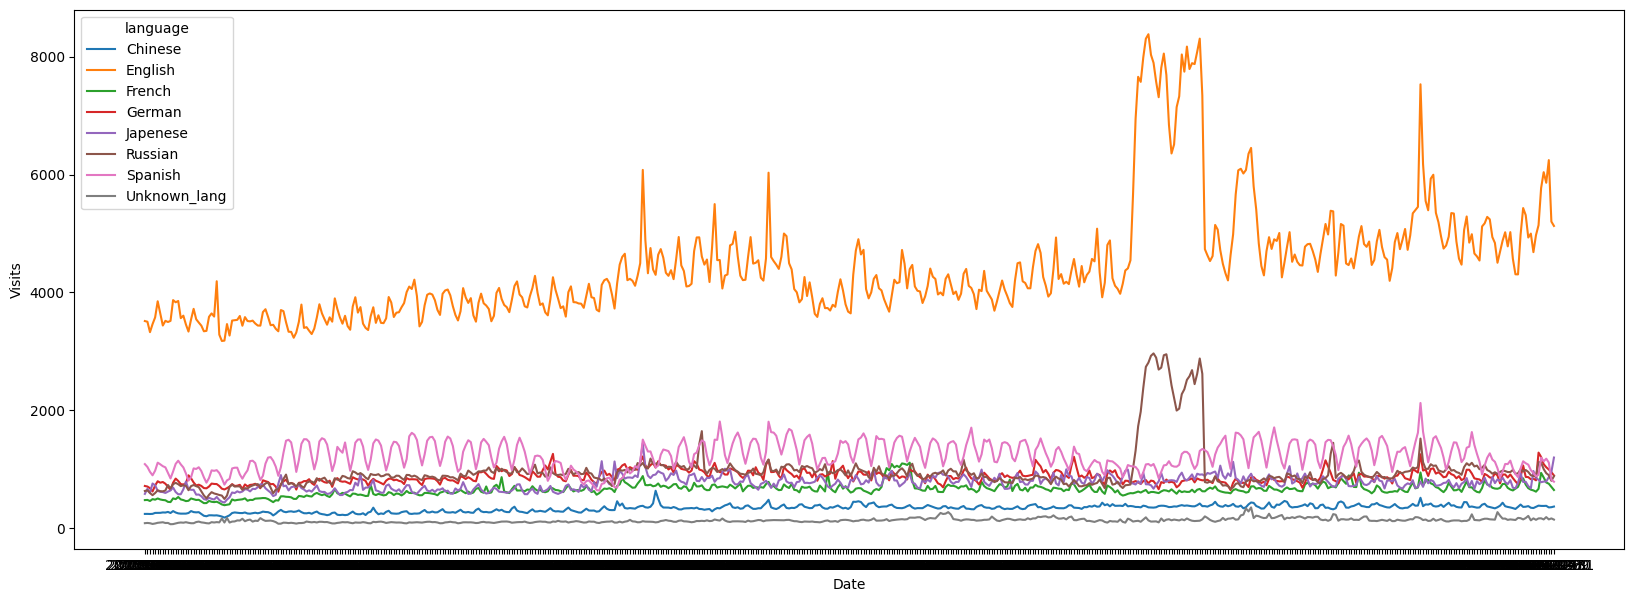

In [ ]:
plt.figure(figsize=(20, 7))
sns.lineplot(data=lang_data, y ='Visits',x='Date', hue='language')
plt.show()

##Making the time series stationary

1. Remove trend and seasonality with decomposition


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
ts_english = lang_data[lang_data['language'] == 'English']['Visits']

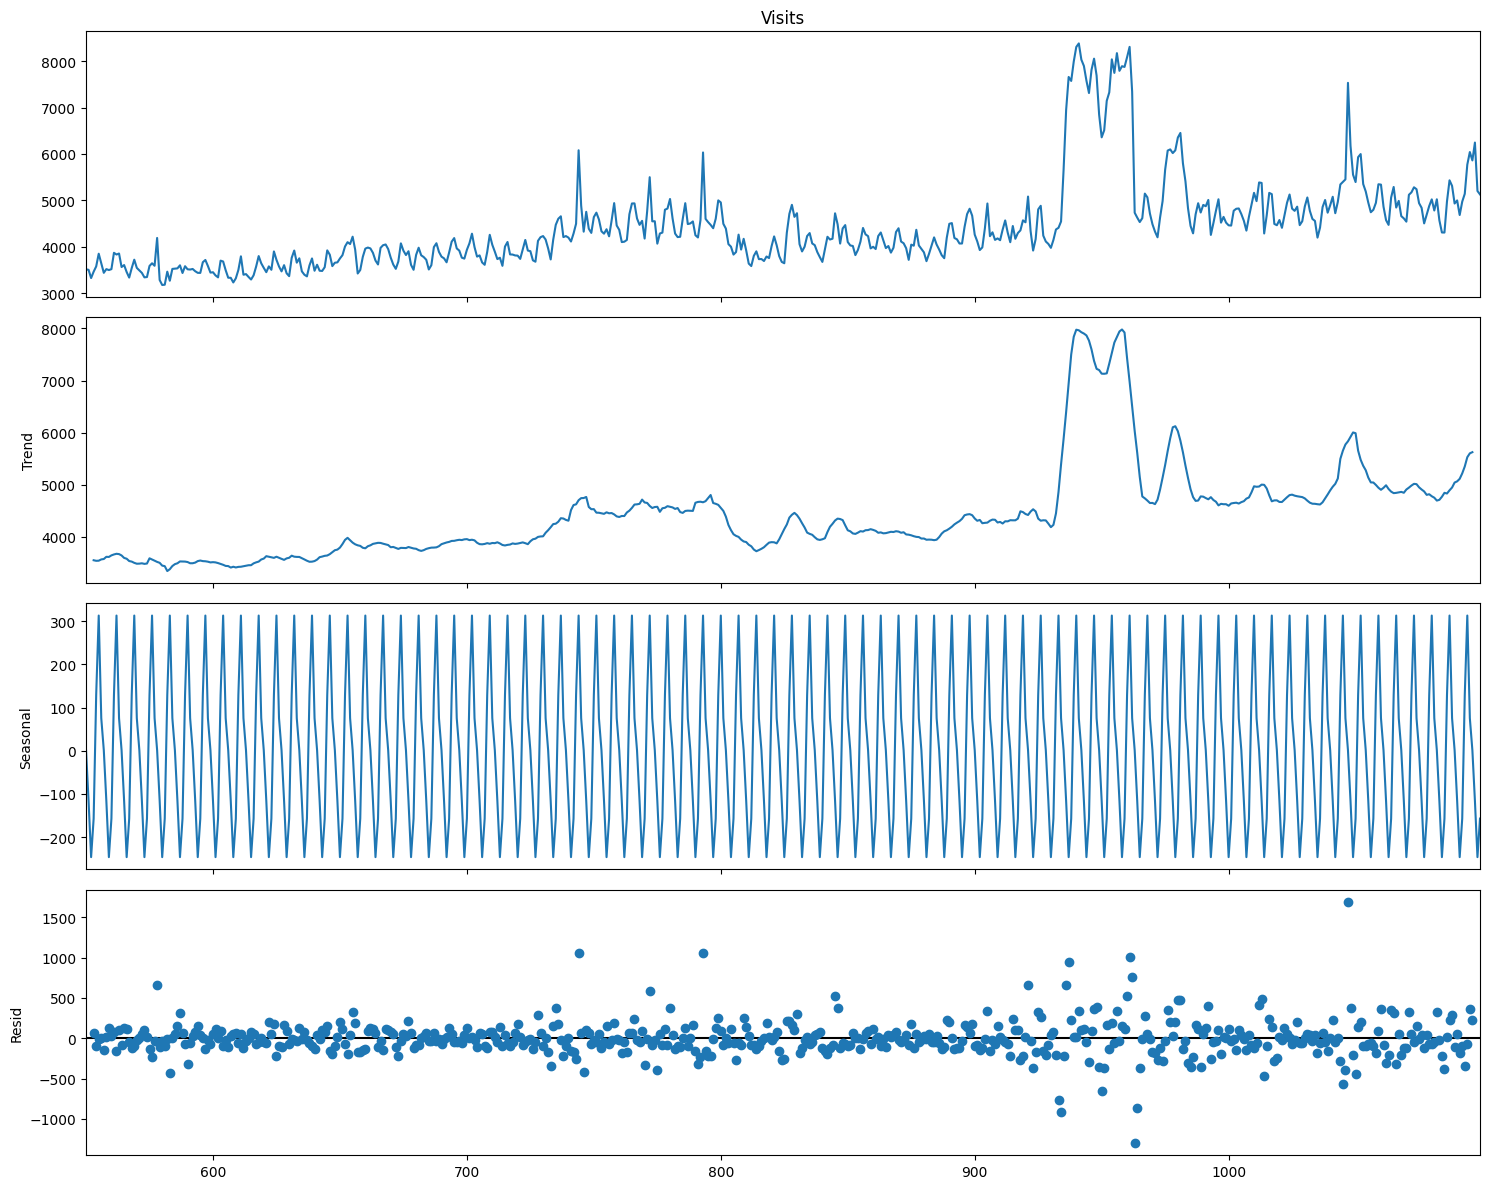

In [ ]:
decomposition = seasonal_decompose(ts_english, model='additive', period=7)

fig = decomposition.plot()
fig.set_size_inches((15, 12))
fig.tight_layout()
plt.show()

2. Remove trend and seasonality with differencing


In [ ]:
ts_diff = pd.DataFrame(ts_english).diff(1)
ts_diff.dropna(inplace = True)

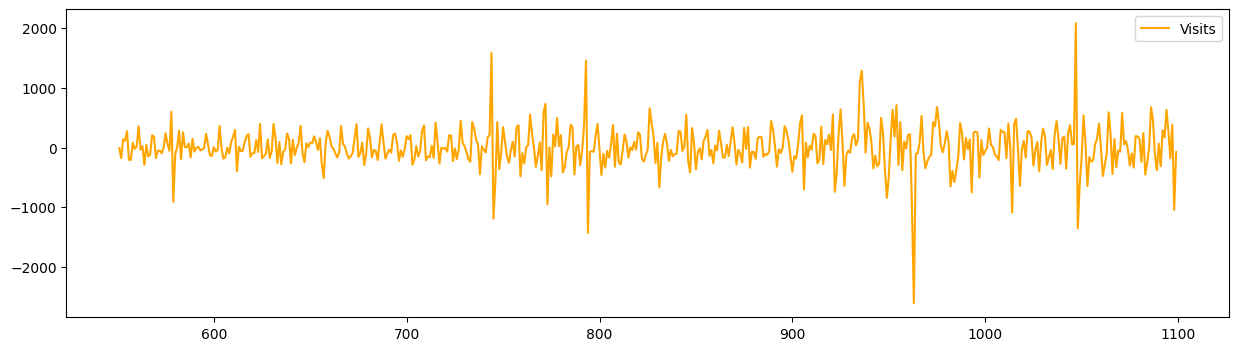

In [ ]:
ts_diff.plot(color = 'orange', figsize=(15, 4))
plt.show()

##Plotting the ACF and PACF plots

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


<Figure size 1500x800 with 0 Axes>

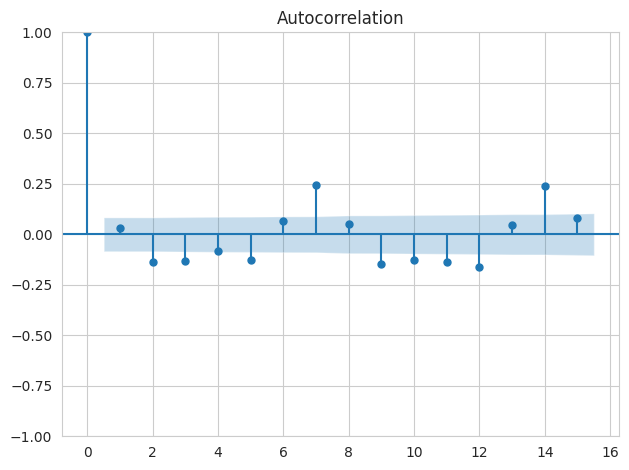

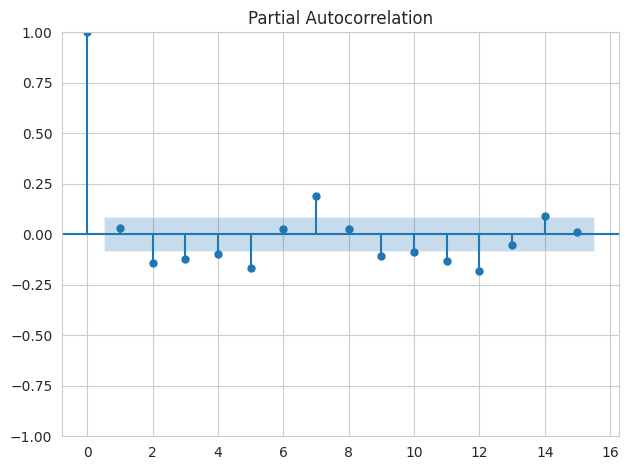

In [ ]:
plt.figure(figsize=(15,8))
sns.set_style("whitegrid")
acf = plot_acf(ts_diff, lags= 15)
acf.tight_layout()
pacf = plot_pacf(ts_diff, lags= 15)
pacf.tight_layout()

##ARIMA MODEL

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
ts_english = lang_data[lang_data.language == 'English'][['Date', 'Visits']]
ts_english.set_index('Date', drop=True, inplace=True)

In [ ]:
def arima_model(n, order, time_series):
    model = ARIMA(time_series[:-n], order=order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=n, alpha=0.05)
    time_series.index = pd.to_datetime(time_series.index)
    forecast.index = pd.to_datetime(forecast.index)

    time_series[-60:].plot(label='Actual')
    forecast.plot(label='Forecast', linestyle='dashed', marker='o', markerfacecolor='green', markersize=2)
    plt.legend(loc="upper right")
    plt.title(f'ARIMA BASE Model {order}: Actual vs Forecasts', fontsize=15, fontweight='bold')
    plt.show()


    actuals = time_series.values[-n:]
    errors = time_series.values[-n:] - forecast.values

    mape = np.mean(np.abs(errors) / np.abs(actuals))
    rmse = np.sqrt(np.mean(errors**2))

    # Print MAPE & RMSE
    print('-' * 80)
    print(f'MAPE of Model: {np.round(mape, 5)}')
    print('-' * 80)
    print(f'RMSE of Model: {np.round(rmse, 3)}')
    print('-' * 80)

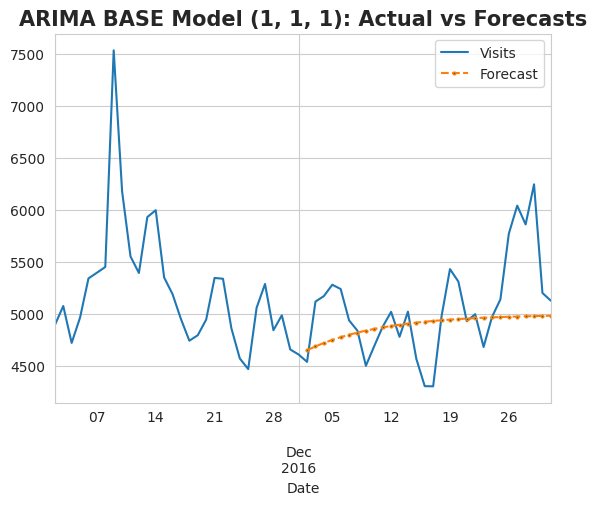

--------------------------------------------------------------------------------
MAPE of Model: 0.06962
--------------------------------------------------------------------------------
RMSE of Model: 497.393
--------------------------------------------------------------------------------


In [ ]:
arima_model(30, (1,1,1), ts_english)



*   we will train a sarimax model for that and see if we get any improvements from using the two information.








*  We get the exogenous data from this csv file for english pages
*  The seasonal order and the values of PDQ are based upon various trials and comparison of the models



##SARIMAX

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
def sarimax_model(time_series, n, p=0, d=0, q=0, P=0, D=0, Q=0, s=0, exog = []):

    #Creating SARIMAX Model with order(p,d,q) & seasonal_order=(P, D, Q, s)
    model = SARIMAX(time_series[:-n],
                    order=(p, d, q),
                    seasonal_order=(P, D, Q, s),
                    exog=exog[:-n],
                    initialization='approximate_diffuse')
    model_fit = model.fit()

    # Forecasting last n-values
    model_forecast = model_fit.forecast(n, dynamic=True, exog=pd.DataFrame(exog[-n:]))

    # Plotting Actual & Forecasted values
    plt.figure(figsize=(20, 8))
    time_series[-60:].plot(label='Actual')
    model_forecast[-60:].plot(label='Forecast', color='red',
                              linestyle='dashed', marker='o', markerfacecolor='green', markersize=5)
    plt.legend(loc="upper right")
    plt.title(f'SARIMAX Model ({p},{d},{q}) ({P},{D},{Q},{s}) : Actual vs Forecasts', fontsize=15, fontweight='bold')
    plt.show()

    # Calculating MAPE & RMSE
    actuals = time_series.values[-n:]
    errors = time_series.values[-n:] - model_forecast.values

    mape = np.mean(np.abs(errors) / np.abs(actuals))
    rmse = np.sqrt(np.mean(errors ** 2))

    # Printing metrics
    print('-' * 80)
    print(f'MAPE of Model : {np.round(mape, 5)}')
    print('-' * 80)
    print(f'RMSE of Model : {np.round(rmse, 3)}')
    print('-' * 80)

##GRID Search

In [ ]:
def sarimax_grid_search(time_series, n, param, d_param, s_param, exog=[]):
    # Creating df for storing results summary
    param_df = pd.DataFrame(columns=['serial', 'pdq', 'PDQs', 'mape', 'rmse'])

    # Generate all parameter combinations
    param_combinations = product(param, d_param, param, param, d_param, param, s_param)

    # Counter for keeping track of iterations
    counter = 0

    for p, d, q, P, D, Q, s in param_combinations:
        model = SARIMAX(time_series[:-n],
                        order=(p, d, q),
                        seasonal_order=(P, D, Q, s),
                        exog=exog[:-n],
                        initialization='approximate_diffuse')
        model_fit = model.fit()

        model_forecast = model_fit.forecast(n, dynamic=True, exog=pd.DataFrame(exog[-n:]))

        actuals = time_series.values[-n:]
        errors = time_series.values[-n:] - model_forecast.values

        mape = np.mean(np.abs(errors) / np.abs(actuals))
        rmse = np.sqrt(np.mean(errors**2))
        mape = np.round(mape, 5)
        rmse = np.round(rmse, 3)

        counter += 1
        list_row = [counter, (p, d, q), (P, D, Q, s), mape, rmse]
        param_df.loc[len(param_df)] = list_row

        # Print statement to check progress of Loop
        print(f'Possible Combination: {counter} out of {len(param)**4 * len(s_param) * len(d_param)**2} calculated')

    return param_df

In [ ]:
time_series = ts_english
n = 30
param = [0,1,2]
d_param = [0,1]
s_param = [7]

english_params  = sarimax_grid_search(time_series, n, param, d_param,s_param,df1)

Possible Combination: 1 out of 324 calculated
Possible Combination: 2 out of 324 calculated
Possible Combination: 3 out of 324 calculated
Possible Combination: 4 out of 324 calculated
Possible Combination: 5 out of 324 calculated
Possible Combination: 6 out of 324 calculated
Possible Combination: 7 out of 324 calculated
Possible Combination: 8 out of 324 calculated
Possible Combination: 9 out of 324 calculated
Possible Combination: 10 out of 324 calculated
Possible Combination: 11 out of 324 calculated
Possible Combination: 12 out of 324 calculated
Possible Combination: 13 out of 324 calculated
Possible Combination: 14 out of 324 calculated
Possible Combination: 15 out of 324 calculated
Possible Combination: 16 out of 324 calculated
Possible Combination: 17 out of 324 calculated
Possible Combination: 18 out of 324 calculated
Possible Combination: 19 out of 324 calculated
Possible Combination: 20 out of 324 calculated
Possible Combination: 21 out of 324 calculated
Possible Combination: 

In [ ]:
english_params.sort_values(['mape', 'rmse']).head()

,serial,pdq,PDQs,mape,rmse
30,31,"(0, 0, 1)","(2, 0, 0, 7)",0.08006,544.680
289,290,"(2, 1, 1)","(0, 0, 1, 7)",0.08166,566.324
199,200,"(1, 1, 2)","(0, 0, 1, 7)",0.08166,566.327
200,201,"(1, 1, 2)","(0, 0, 2, 7)",0.08215,568.882
290,291,"(2, 1, 1)","(0, 0, 2, 7)",0.08217,569.008


##Comparing the predicted views for different languages

In [ ]:
def pipeline_sarimax_grid_search_without_exog(languages, data_language, n, param, d_param, s_param):

    best_param_df = pd.DataFrame(columns=['language', 'p', 'd', 'q', 'P', 'D', 'Q', 's', 'mape'])

    for lang in languages:
        print(f'--------------------------------------------------------------')
        print(f'          Finding best parameters for {lang}                  ')
        print(f'--------------------------------------------------------------')

        time_series = data_language[data_language['language'] == lang][['Date', 'Visits']]
        time_series.set_index('Date', drop=True, inplace=True)
        best_mape = 100

        counter = 0
        param_combinations = product(param, d_param, param, param, d_param, param, s_param)

        for p, d, q, P, D, Q, s in param_combinations:
            model = SARIMAX(time_series[:-n],
                            order=(p, d, q),
                            seasonal_order=(P, D, Q, s),
                            initialization='approximate_diffuse')
            model_fit = model.fit()
            model_forecast = model_fit.forecast(n, dynamic=True)

            actuals = time_series.values[-n:]
            errors = time_series.values[-n:] - model_forecast.values
            mape = np.mean(np.abs(errors) / np.abs(actuals))

            counter += 1
            if mape < best_mape:
                best_mape = mape
                best_p, best_d, best_q = p, d, q
                best_P, best_D, best_Q = P, D, Q
                best_s = s

            print(f'Possible Combination: {counter} out of {(len(param)**4)*len(s_param)*(len(d_param)**2)} calculated')

        best_mape = np.round(best_mape, 5)
        print(f'--------------------------------------------------------------')
        print(f'Minimum MAPE for {lang} = {best_mape}')
        print(f'Corresponding Best Parameters are {best_p, best_d, best_q, best_P, best_D, best_Q, best_s}')
        print(f'--------------------------------------------------------------')

        best_param_row = [lang, best_p, best_d, best_q, best_P, best_D, best_Q, best_s, best_mape]
        best_param_df.loc[len(best_param_df)] = best_param_row

    return best_param_df

In [53]:
languages = ['Chinese', 'French', 'German', 'Japenese', 'Russian', 'Spanish']
n = 30
param = [0,1,2]
d_param = [0,1]
s_param = [7]


best_param_df = pipeline_sarimax_grid_search_without_exog(languages, lang_data, n, param, d_param, s_param)

--------------------------------------------------------------
          Finding best parameters for Chinese                  
--------------------------------------------------------------
Possible Combination: 1 out of 324 calculated
Possible Combination: 2 out of 324 calculated
Possible Combination: 3 out of 324 calculated
Possible Combination: 4 out of 324 calculated
Possible Combination: 5 out of 324 calculated
Possible Combination: 6 out of 324 calculated
Possible Combination: 7 out of 324 calculated
Possible Combination: 8 out of 324 calculated
Possible Combination: 9 out of 324 calculated
Possible Combination: 10 out of 324 calculated
Possible Combination: 11 out of 324 calculated
Possible Combination: 12 out of 324 calculated
Possible Combination: 13 out of 324 calculated
Possible Combination: 14 out of 324 calculated
Possible Combination: 15 out of 324 calculated
Possible Combination: 16 out of 324 calculated
Possible Combination: 17 out of 324 calculated
Possible Combination

In [54]:
best_param_df.sort_values(['mape'], inplace = True)
best_param_df

,language,p,d,q,P,D,Q,s,mape
0,Chinese,2,1,0,0,0,1,7,0.05075
4,Russian,0,0,2,1,0,1,7,0.06027
1,French,1,1,1,0,0,0,7,0.07731
3,Japenese,1,1,0,0,0,1,7,0.08021
2,German,1,0,1,0,0,0,7,0.08369
5,Spanish,1,0,0,0,0,1,7,0.13849


In [55]:
def plot_best_SARIMAX_model(languages, data_language, n, best_param_df):
    for lang in languages:
        # Fetching respective best parameters for that language
        params_lang = best_param_df[best_param_df['language'] == lang].iloc[0]
        p, d, q, P, D, Q, s = params_lang[['p', 'd', 'q', 'P', 'D', 'Q', 's']]

        # Creating language time-series
        time_series = data_language[data_language['language'] == lang][['Date', 'Visits']]
        time_series.set_index('Date', drop=True, inplace=True)

        # Creating SARIMAX Model
        model = SARIMAX(time_series[:-n], order=(p, d, q),
                        seasonal_order=(P, D, Q, s), initialization='approximate_diffuse')
        model_fit = model.fit()

        # Creating forecast for last n-values
        model_forecast = model_fit.forecast(n, dynamic=True)

        # Calculating MAPE & RMSE
        actuals = time_series.values[-n:]
        errors = time_series.values[-n:] - model_forecast.values
        mape = np.mean(np.abs(errors) / np.abs(actuals))
        rmse = np.sqrt(np.mean(errors**2))

        # Printing model statistics
        print(f'\n{"-" * 90}')
        print(f'SARIMAX model for {lang} Time Series')
        print(f'Parameters of Model: ({p}, {d}, {q}) ({P}, {D}, {Q}, {s})')
        print(f'MAPE of Model: {np.round(mape, 5)}')
        print(f'RMSE of Model: {np.round(rmse, 3)}')
        print(f'{"-" * 90}')

        # Plotting Actual & Forecasted values
        time_series.index = time_series.index.astype('datetime64[ns]')
        model_forecast.index = model_forecast.index.astype('datetime64[ns]')
        plt.figure(figsize=(20, 8))
        time_series[-60:].plot(label='Actual')
        model_forecast[-60:].plot(label='Forecast', color='red',
                                  linestyle='dashed', marker='o', markerfacecolor='green', markersize=5)
        plt.legend(loc="upper right")
        plt.title(f'SARIMAX Model ({p}, {d}, {q}) ({P}, {D}, {Q}, {s}): Actual vs Forecasts',
                  fontsize=15, fontweight='bold')
        plt.show()

    return 0


------------------------------------------------------------------------------------------
SARIMAX model for Chinese Time Series
Parameters of Model: (2, 1, 0) (0, 0, 1, 7)
MAPE of Model: 0.05075
RMSE of Model: 26.497
------------------------------------------------------------------------------------------


<Figure size 2000x800 with 0 Axes>

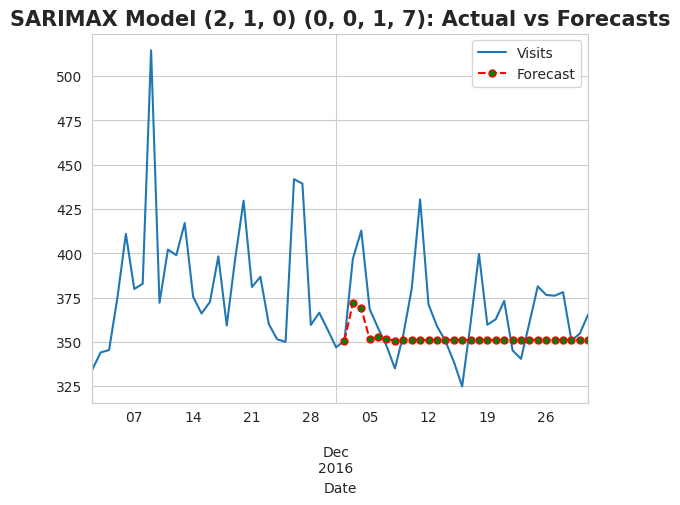


------------------------------------------------------------------------------------------
SARIMAX model for French Time Series
Parameters of Model: (1, 1, 1) (0, 0, 0, 7)
MAPE of Model: 0.07731
RMSE of Model: 86.175
------------------------------------------------------------------------------------------


<Figure size 2000x800 with 0 Axes>

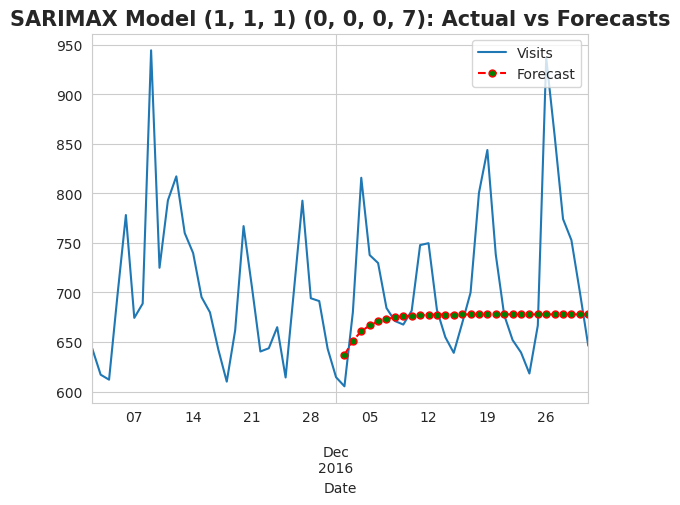


------------------------------------------------------------------------------------------
SARIMAX model for German Time Series
Parameters of Model: (1, 0, 1) (0, 0, 0, 7)
MAPE of Model: 0.08369
RMSE of Model: 124.149
------------------------------------------------------------------------------------------


<Figure size 2000x800 with 0 Axes>

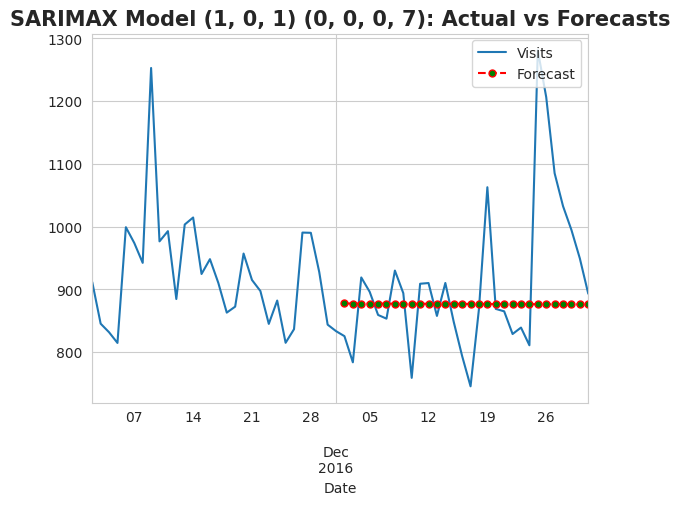


------------------------------------------------------------------------------------------
SARIMAX model for Japenese Time Series
Parameters of Model: (1, 1, 0) (0, 0, 1, 7)
MAPE of Model: 0.08021
RMSE of Model: 105.439
------------------------------------------------------------------------------------------


<Figure size 2000x800 with 0 Axes>

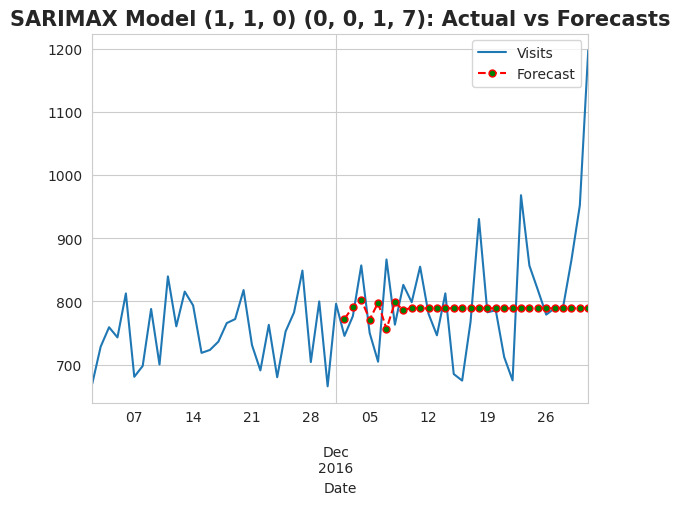


------------------------------------------------------------------------------------------
SARIMAX model for Russian Time Series
Parameters of Model: (0, 0, 2) (1, 0, 1, 7)
MAPE of Model: 0.06027
RMSE of Model: 74.136
------------------------------------------------------------------------------------------


<Figure size 2000x800 with 0 Axes>

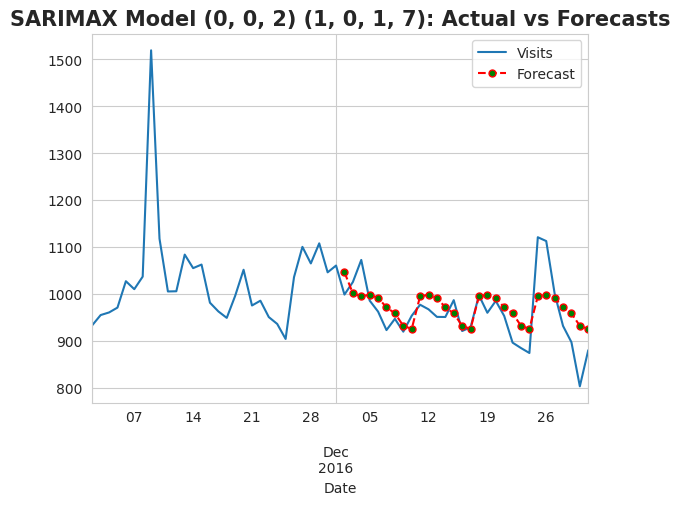


------------------------------------------------------------------------------------------
SARIMAX model for Spanish Time Series
Parameters of Model: (1, 0, 0) (0, 0, 1, 7)
MAPE of Model: 0.13849
RMSE of Model: 170.962
------------------------------------------------------------------------------------------


<Figure size 2000x800 with 0 Axes>

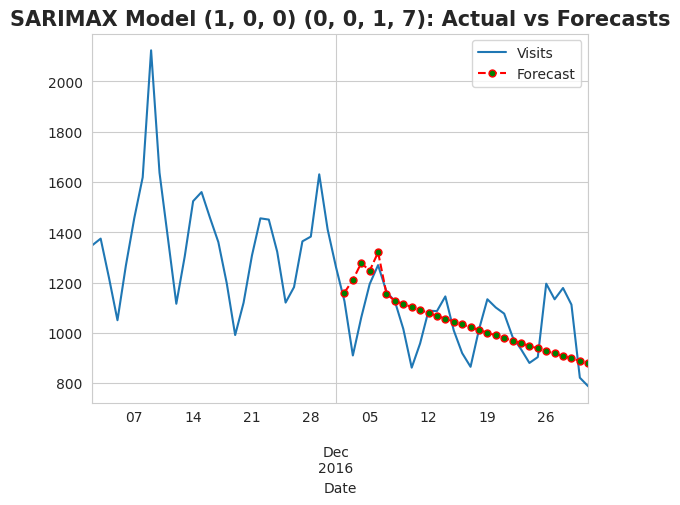

0

In [56]:
languages = ['Chinese', 'French', 'German', 'Japenese', 'Russian', 'Spanish']
n = 30
plot_best_SARIMAX_model(languages, lang_data, n, best_param_df)

##Using FB Prophet

In [57]:
time_series = lang_data[lang_data['language'] == 'English'][['Date', 'Visits']]
# time_series.set_index('Date', drop=True, inplace=True)
time_series.columns = ['ds', 'y']
time_series['df1'] = df1

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmporctapl8/uy6iv2zg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmporctapl8/4ahpswl6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78040', 'data', 'file=/tmp/tmporctapl8/uy6iv2zg.json', 'init=/tmp/tmporctapl8/4ahpswl6.json', 'output', 'file=/tmp/tmporctapl8/prophet_modely_jd4i51/prophet_model-20240404185953.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:59:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:59:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


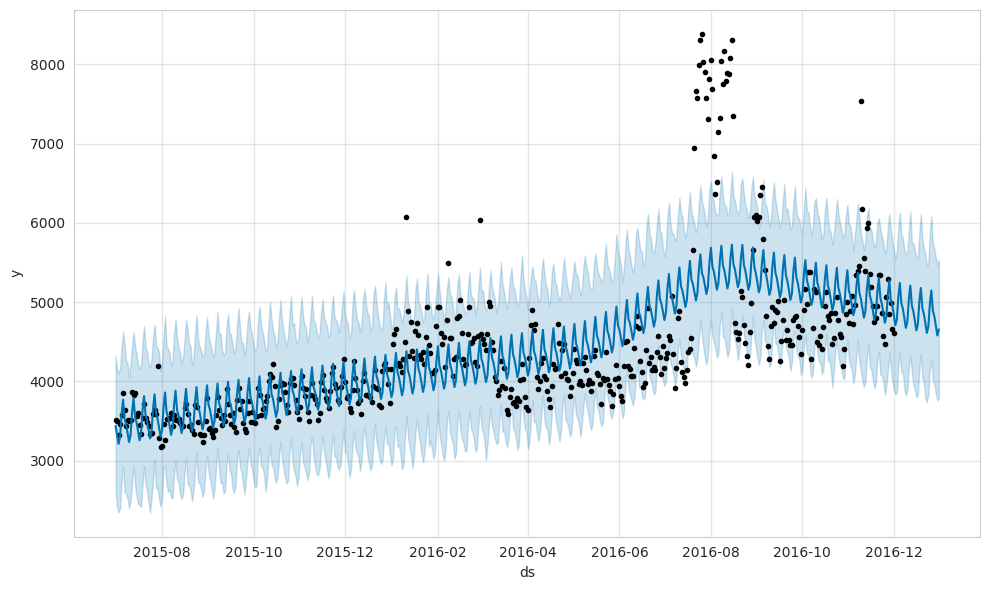

In [58]:
prophet1 = Prophet(weekly_seasonality=True)
prophet1.fit(time_series[['ds', 'y']][:-30])
future = prophet1.make_future_dataframe(periods=30, freq= 'D')
forecast = prophet1.predict(future)
fig1 = prophet1.plot(forecast)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmporctapl8/vp_sfz8h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmporctapl8/prb5axi1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58167', 'data', 'file=/tmp/tmporctapl8/vp_sfz8h.json', 'init=/tmp/tmporctapl8/prb5axi1.json', 'output', 'file=/tmp/tmporctapl8/prophet_modeldss14ibh/prophet_model-20240404190017.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:00:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:00:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


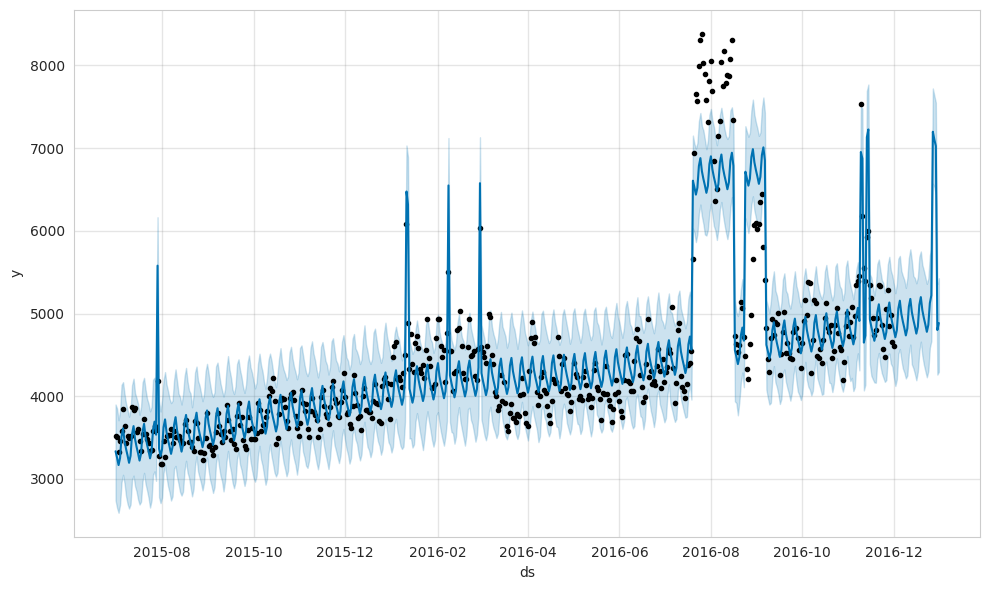

In [59]:
prophet2 = Prophet(weekly_seasonality=True)
prophet2.add_regressor('df1')
prophet2.fit(time_series[:-30])
#future2 = prophet2.make_future_dataframe(periods=30, freq= 'D')
forecast2 = prophet2.predict(time_series)
fig2 = prophet2.plot(forecast2)

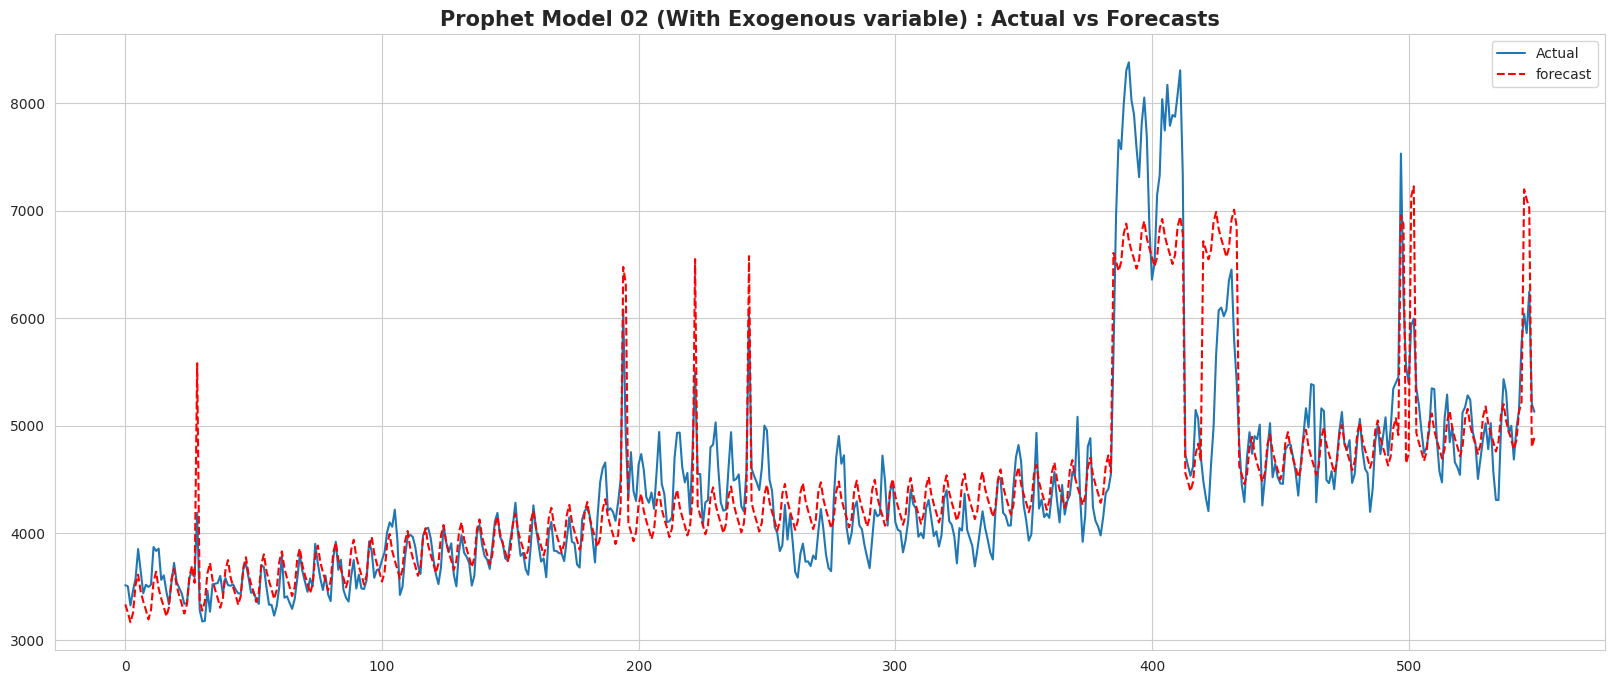

In [60]:
actual = time_series['y'].values
forecast = forecast2['yhat'].values

plt.figure(figsize = (20,8))
plt.plot(actual, label = 'Actual')
plt.plot(forecast, label = 'forecast', color = 'red', linestyle='dashed')
plt.legend(loc="upper right")
plt.title(f'Prophet Model 02 (With Exogenous variable) : Actual vs Forecasts', fontsize = 15, fontweight = 'bold')
plt.show()

In [61]:
errors = abs(actual - forecast)
mape = np.mean(errors/abs(actual))
mape

0.05945140053559279

FB Prophet Model is able to capture peaks because of exogenous variable and is giving a MAPE of 6%

##Insights and Recommendations

[Data Preprocessing]

Over time, there has been a decrease in the number of missing values, indicating improved data collection or website creation.
Some websites initially have all missing values, possibly due to being created after the data collection period.
Null values spanning over 300 days were removed, ensuring meaningful context in the time series. Remaining missing values were imputed with zeros under the assumption of no traffic recorded on those dates.

[Exploratory Data Analysis (EDA)]

English language articles receive the highest number of visits compared to other languages.
Both desktop and mobile access have similar usage patterns. Organic views significantly surpass spider views.


[Model Comparison]SARIMAX models with exogenous variables outperformed traditional ARIMA models, indicating the importance of incorporating external factors. Grid search was employed to optimize model parameters, further enhancing performance.
Models were built for each language, with Chinese achieving the lowest MAPE of 0.039, followed by Russian (MAPE: 0.05) and French (MAPE: 0.07).

[FB Prophet models were employed, leveraging exogenous variables to capture peaks effectively and yielding a MAPE of 6%.]





* Focus advertising efforts on English language pages due to their low MAPE and high mean visits, maximizing reach and effectiveness.
* Avoid advertising on Chinese language pages unless there's a specific marketing strategy tailored for Chinese populations, as they have the lowest number of visits.

*   Explore advertising opportunities on Russian language pages, as they present a promising opportunity for high conversion rates with their decent number of visits and low MAPE if utilized effectively.
Spanish Language Pages:
*  Exercise caution when advertising on Spanish language pages despite their second-highest number of visits, as they exhibit the highest MAPE. Advertisements on these pages may not effectively reach the intended audience.





##Questionnaire

Ques 1.)Defining the problem statements and where can this and modifications of this be used?

Answer: At AdEase, the Data Science team is tasked with analyzing per-page view reports for Wikipedia pages over a 550-day period. The primary goal is to forecast page views to optimize ad placement for clients. With a dataset covering 145,000 Wikipedia pages and daily view counts, the project aims to provide insights into ad performance across various languages and regions.

Ques 2.)Write 3 inferences you made from the data visualizations.

Answer:

Linguistic Diversity: The analysis indicates the presence of seven languages, with English being the most prevalent, followed by Japanese, German, and French.

Access Type Distribution: Access types are segmented into All-access, mobile-web, and desktop, with proportions of 51.4%, 24.9%, and 23.6% respectively.

Access-Origin Insights: The data highlights two access origins—'all-agents' and 'spider'—with the majority of access coming from 'all-agents' (75.8%) compared to 'spider' (24.2%).

Ques 3.)What does the decomposition of series do?
Answer: Time series decomposition is a statistical approach employed to dissect a time series into its fundamental components, allowing for a better grasp of its underlying structure, including trends, seasonality, and irregular fluctuations.

Ques 4.)What level of differencing gave you a stationary series?
Answer: First-order differencing was applied to achieve stationarity in the series.

Ques 5.)Difference between arima, sarima & sarimax.
Answer:

ARIMA: A comprehensive time series forecasting model incorporating autoregression (AR), differencing (I), and moving average (MA) components, suitable for univariate time series data without exogenous variables.

SARIMA: An advanced version of ARIMA that includes seasonal components, ideal for time series data with seasonal patterns.

SARIMAX: An extension of SARIMA allowing for the inclusion of exogenous variables, making it suitable for time series data with both seasonal patterns and external factors.



Ques 6.) Compare the number of views in different languages

In [62]:
Group = reshaped.groupby(['language','access_type','access_origin'], as_index=False)['Visits'].sum()

<Axes: xlabel='language', ylabel='Visits'>

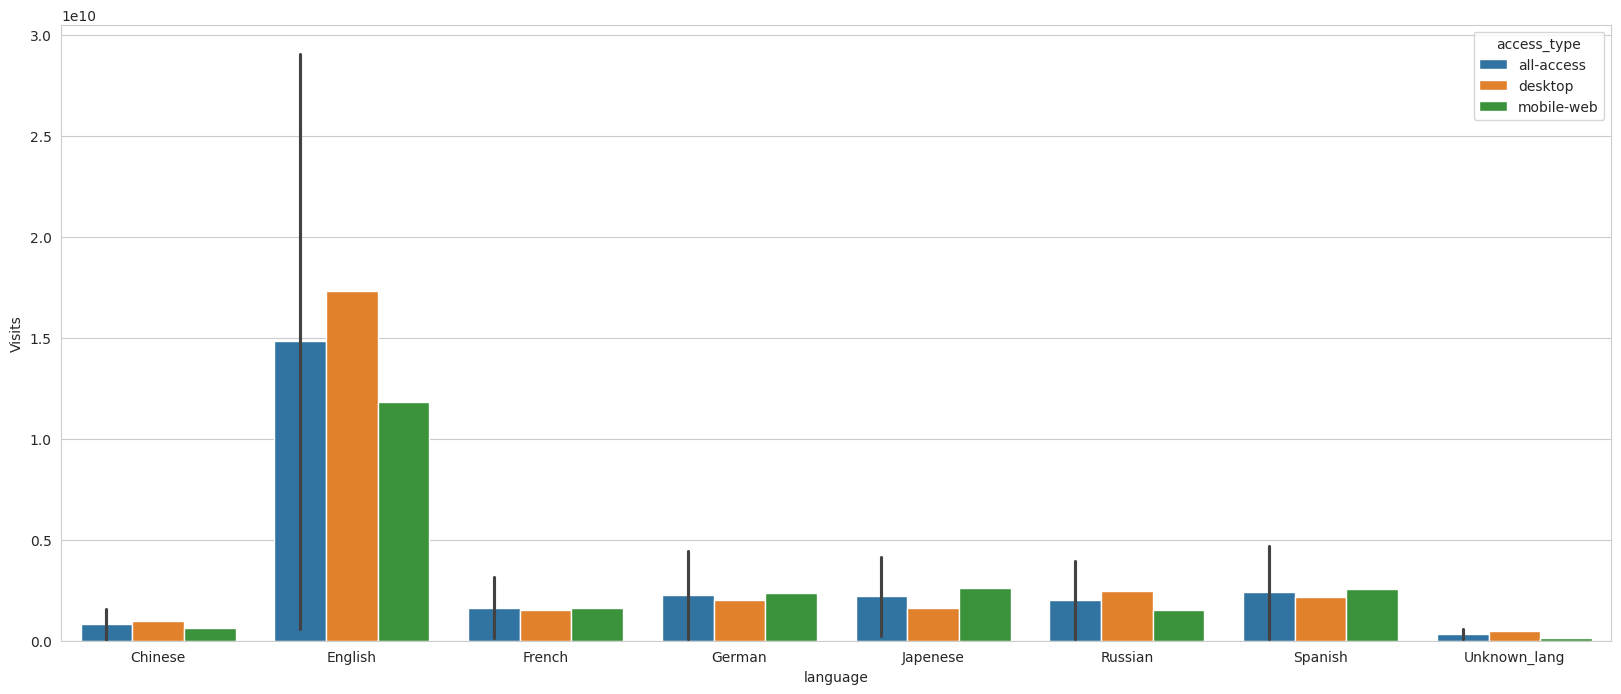

In [63]:
plt.figure(figsize=(20, 8))
sns.barplot(Group, x="language", y="Visits", hue="access_type")

From the above data, it can be inferred that English Language has most views in all type of access.

Ques 7.) What other methods other than grid search would be suitable to get the model for all languages?

Answer: In addition to grid search, methods such as Bayesian optimization using packages like hyperopt, optuna, or sci-kit-optimize can be employed. Consider experimenting with alternative models like tsmixer or deep learning architectures to enhance the modeling process.